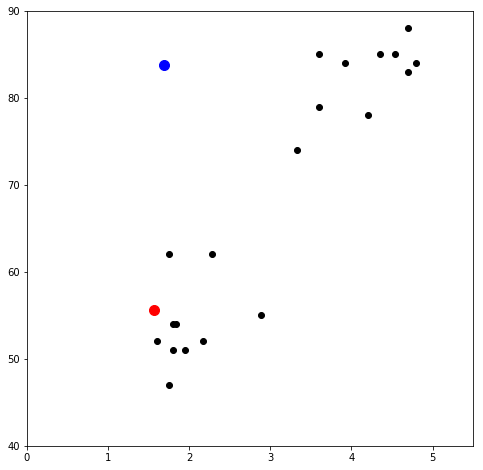

{1: [1.5631288814126716, 55.6297228874798], 2: [1.6956507479041556, 83.73854462266655]}


In [114]:
#problem 5a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#x is duration, y is wait
df = pd.DataFrame({
    'x': [3.6,1.8,2.283,3.333,2.883,4.533,1.95,1.833,4.7,3.6,1.6,4.35,3.917,4.2,1.75,1.8,4.7,2.167,4.8,1.75],
    'y': [79,54,62,74,55,85,51,54,88,85,52,85,84,78,62,51,83,52,84,47]
})

k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.uniform(1.5, 5.5), np.random.uniform(40, 90)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'b', 3: 'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100,color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()
print(centroids)

        x   y  distance_from_1  distance_from_2  closest color
0   3.600  79        23.458872         5.106893        2     b
1   1.800  54         1.646847        29.738728        1     r
2   2.283  62         6.410822        21.746478        1     r
3   3.333  74        18.455339         9.875230        2     b
4   2.883  55         1.462399        28.763062        1     r
5   4.533  85        29.520049         3.105128        2     b
6   1.950  51         4.645859        32.739533        1     r
7   1.833  54         1.651916        29.738862        1     r
8   4.700  88        32.521913         5.214031        2     b
9   3.600  85        29.440822         2.284254        2     b
10  1.600  52         3.629910        31.738689        1     r
11  4.350  85        29.502200         2.938850        2     b
12  3.917  84        28.467760         2.236683        2     b
13  4.200  78        22.525150         6.261203        2     b
14  1.750  62         6.373017        21.738613        

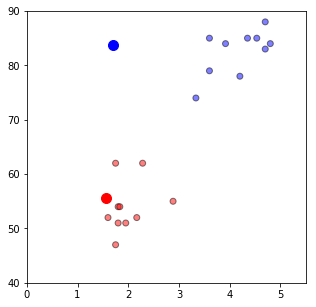

In [115]:
#assignment stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s= 100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

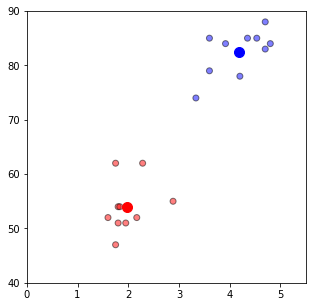

In [116]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

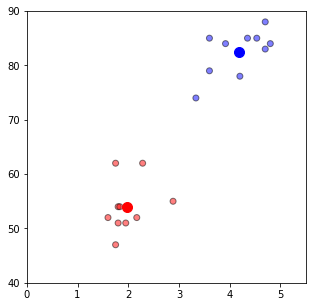

In [117]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100,color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

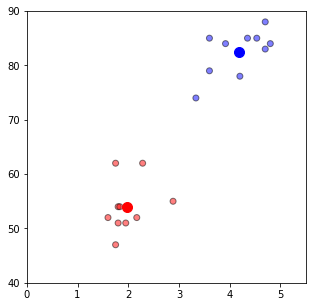

In [118]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100,color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

[[2.6690764638366464, 80.8071179993594], [4.8121702648272455, 51.07886858647888], [4.079338806413246, 44.759081096676525]]


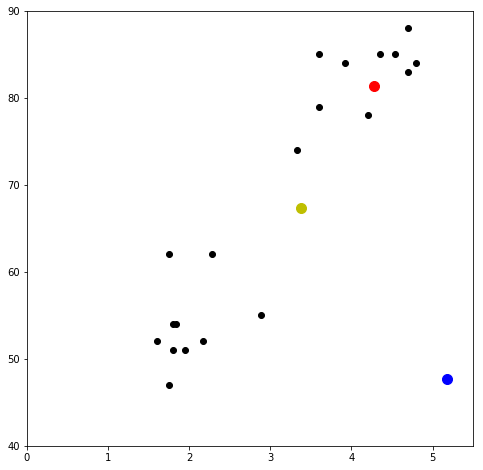

In [119]:
#problem 5b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#x is duration, y is wait
df = pd.DataFrame({
    'x': [3.6,1.8,2.283,3.333,2.883,4.533,1.95,1.833,4.7,3.6,1.6,4.35,3.917,4.2,1.75,1.8,4.7,2.167,4.8,1.75],
    'y': [79,54,62,74,55,85,51,54,88,85,52,85,84,78,62,51,83,52,84,47]
})

k = 3
centroids = {
    i+1: [np.random.uniform(1.5, 5.5), np.random.uniform(40, 90)]
    for i in range(k)
}
print(newcentroids)
fig = plt.figure(figsize=(8, 8))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'b', 3: 'y'}
for i in range(k):
    plt.scatter(*centroids[i+1], s=100, color=colmap[i+1])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()


        x   y  distance_from_1  distance_from_2  distance_from_3  closest  \
0   3.600  79         2.423821        31.383543        11.688637        1   
1   1.800  54        27.439776         7.185200        13.406872        2   
2   2.283  62        19.430309        14.632393         5.425515        3   
3   3.333  74         7.388229        26.408284         6.686734        3   
4   2.883  55        26.364701         7.692943        12.323462        2   
5   4.533  85         3.681124        37.349568        17.724103        1   
6   1.950  51        30.416918         4.644686        16.375997        2   
7   1.833  54        27.436820         7.169766        13.403023        2   
8   4.700  88         6.685594        40.346855        20.728632        1   
9   3.600  85         3.733603        37.377208        17.687935        1   
10  1.600  52        29.449670         5.624957        15.416550        2   
11  4.350  85         3.672839        37.353154        17.713141        1   

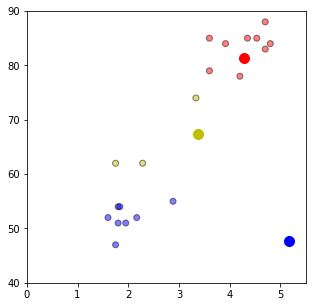

In [120]:
#assignment stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df)

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100,color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

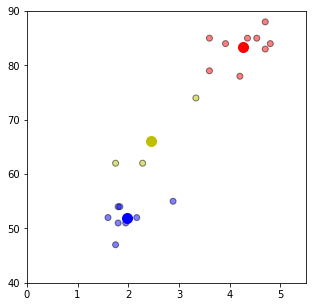

In [121]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
plt.show()

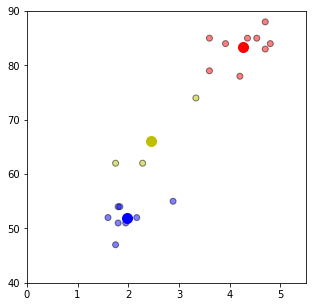

In [122]:
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s=100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()

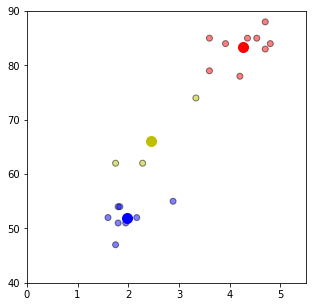

In [123]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], s = 100, color=colmap[i])
plt.xlim(0, 5.5)
plt.ylim(40, 90)
plt.show()